In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
tf.get_logger().setLevel('INFO')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
#KP: You'll see a pop-up from google to sign-in and connect to your drive

Mounted at /content/gdrive


In [ ]:
root_dir = "/content/gdrive/MyDrive/"
base_dir = root_dir + '207_project_files/data/'

In [ ]:
#!unzip '/content/gdrive/MyDrive/207_project_files/data/Driver Drowsiness Dataset (DDD).zip' -d '/content/gdrive/MyDrive/207_project_files/data/full/'

Total number of images: 22348


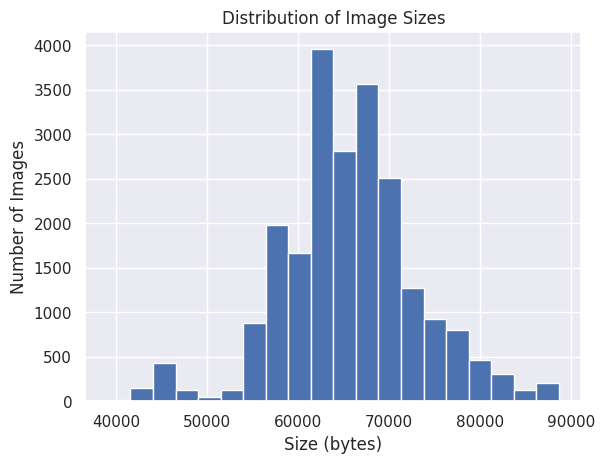

Total number of images: 19445


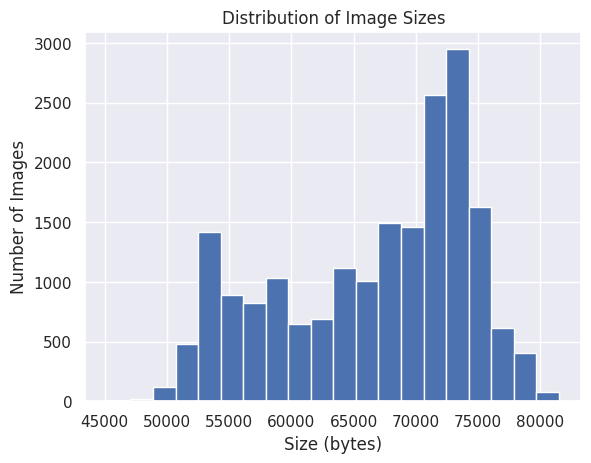

In [ ]:
import os
import matplotlib.pyplot as plt

# KP added

# dir_path_drowsy = '/home/mayank/programs/mids/DriverDrowsiness/raw_data/Drowsy'
# dir_path_non_drowsy = '/home/mayank/programs/mids/DriverDrowsiness/raw_data/NonDrowsy'

# test, train
# dir_path_drowsy = base_dir+'test/Drowsy'
# dir_path_non_drowsy = base_dir+'test/NonDrowsy'


dir_path_drowsy = base_dir+'full/Drowsy'
dir_path_non_drowsy = base_dir+'full/NonDrowsy'


def distribution_image_sizes(directory_path):
    """
    Plots the distribution of image sizes in a directory.
    :param directory_path: path to the directory containing the images
    :return: None
    """
    # get the list of all files in the directory
    files = os.listdir(directory_path)

    # get the list of all image files in the directory
    image_files = [file for file in files if file.endswith('.png')]

    # get the number of images in the directory
    num_images = len(image_files)

    # print the number of images in the directory
    print(f'Total number of images: {num_images}')

    # plot the distribution of image sizes
    sizes = []
    for file in image_files:
        path = os.path.join(directory_path, file)
        size = os.path.getsize(path)
        sizes.append(size)

    plt.hist(sizes, bins=20)
    plt.title('Distribution of Image Sizes')
    plt.xlabel('Size (bytes)')
    plt.ylabel('Number of Images')
    plt.show()


distribution_image_sizes(dir_path_drowsy)

distribution_image_sizes(dir_path_non_drowsy)

Drowsy Sample Image


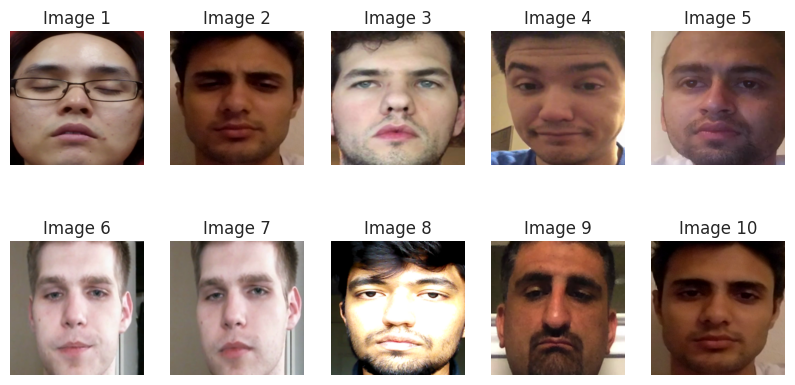

Non Drowsy Sample Image


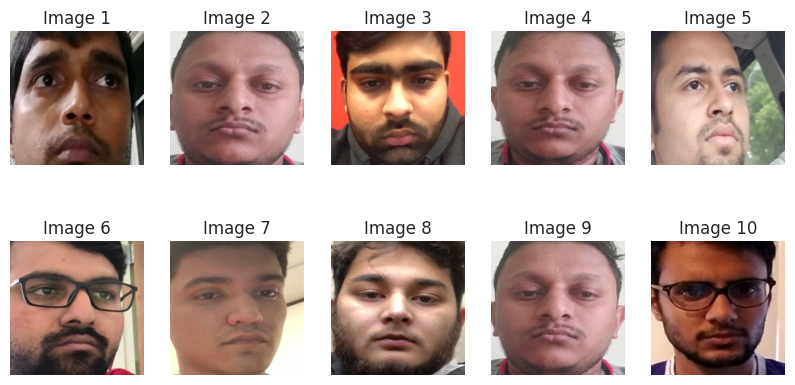

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images(dir_path):

    # get the list of all files in the directory
    files = os.listdir(dir_path)

    # get the list of all image files in the directory
    image_files = [file for file in files if file.endswith('.png')]

    # randomly select 10 images
    selected_images = random.sample(image_files, 10)

    # create a 5x2 grid of subplots
    fig, axs = plt.subplots(2, 5, figsize=(10, 5))

    # loop through the selected images and plot them in the grid
    for i, image in enumerate(selected_images):
        row = i // 5
        col = i % 5

        path = os.path.join(dir_path, image)
        img = mpimg.imread(path)
        axs[row, col].imshow(img)
        axs[row, col].set_title(f'Image {i+1}')
        axs[row, col].axis('off')

        #axs[row+2, col].hist(img.ravel(), bins=256, range=(0.0, 1.0))
        #axs[row+2, col].set_title(f'Histogram of Image {i+1}')
        #axs[row+2, col].set_xlim([0.0, 1.0])

    plt.show()

print ("Drowsy Sample Image")
plot_images(dir_path_drowsy)

print ("Non Drowsy Sample Image")
plot_images(dir_path_non_drowsy)


Drowsy Sample Image Min Max and Histogram


,Image Name,Min value,Max value
0,X0495.png,0.000000,1.000000
1,U0415.png,0.050980,1.000000
2,ZB0073.png,0.000000,1.000000
3,I0783.png,0.074510,1.000000
4,M0636.png,0.000000,1.000000
5,W0214.png,0.058824,0.874510
6,T0083.png,0.000000,1.000000
7,O0942.png,0.043137,0.909804
8,N0296.png,0.000000,0.945098
9,ZB1148.png,0.000000,1.000000


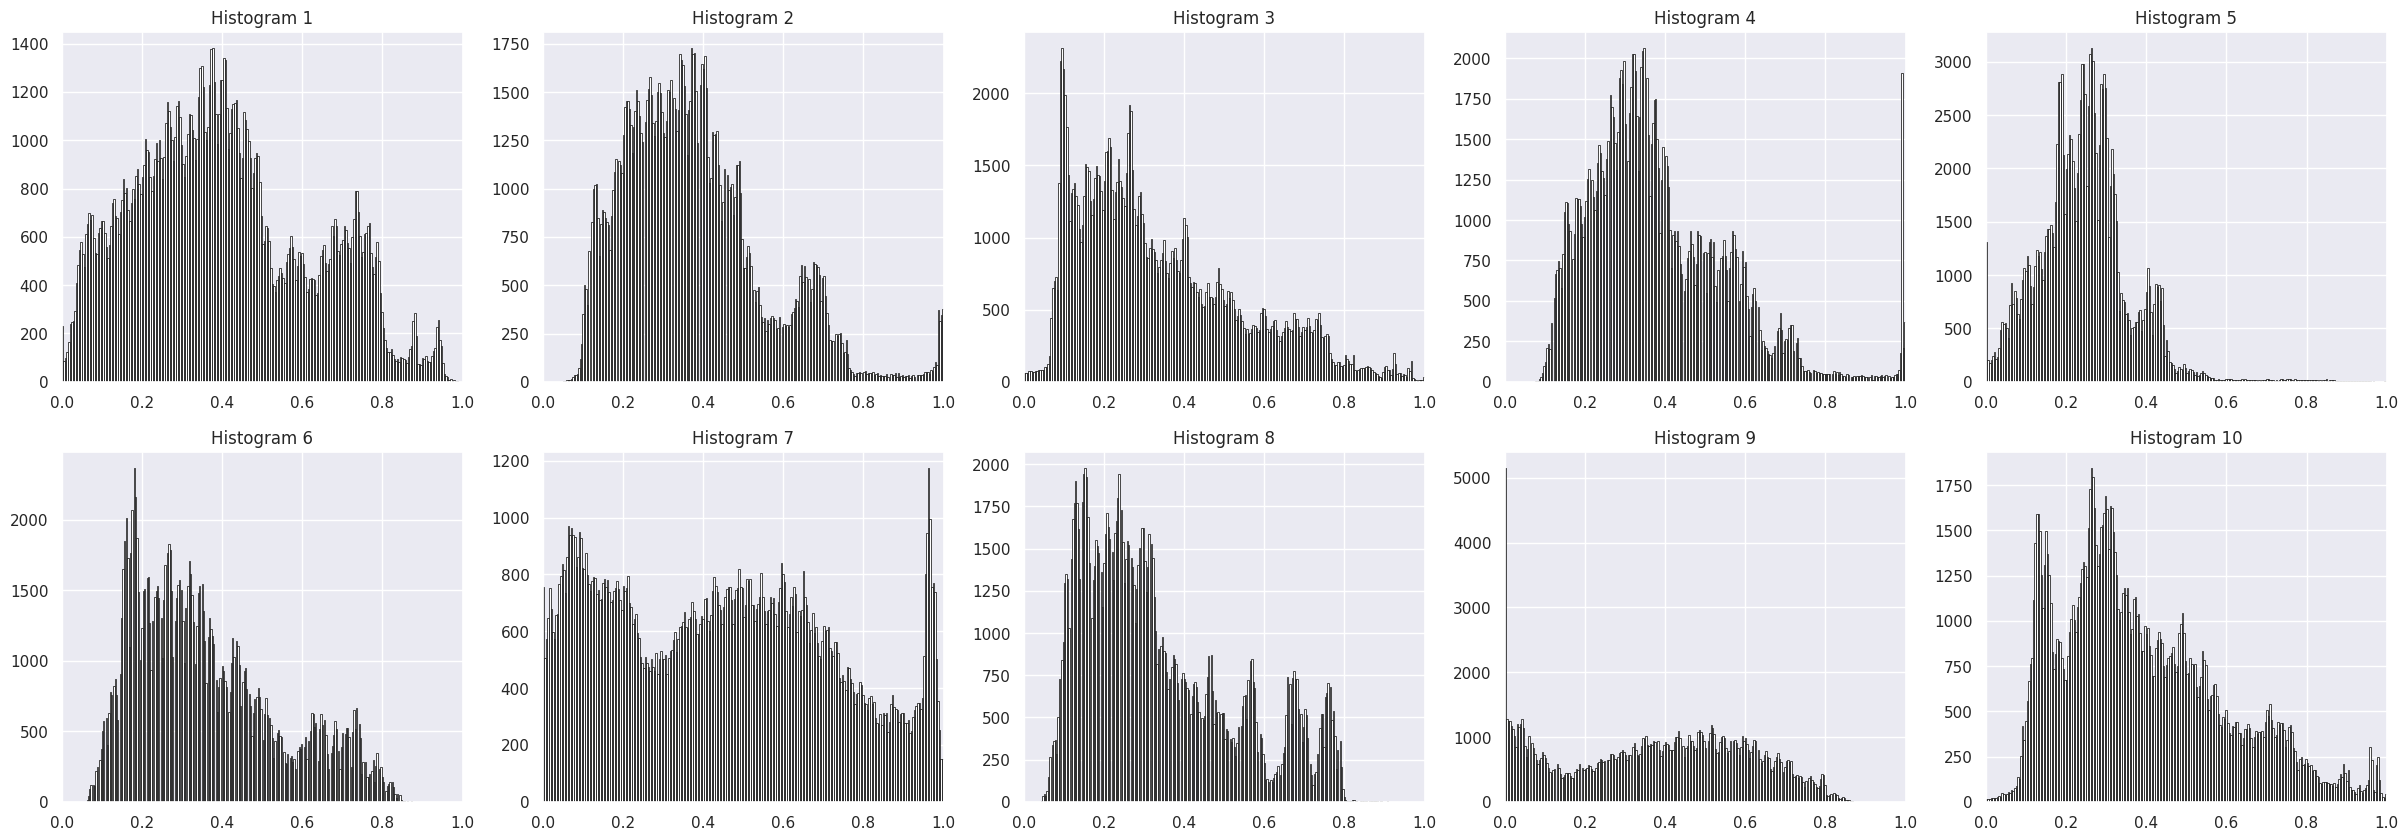

Non Drowsy Sample Image Min Max and Histogram


,Image Name,Min value,Max value
0,a1205.png,0.000000,1.000000
1,o0192.png,0.031373,1.000000
2,zb0233.png,0.000000,1.000000
3,zb0524.png,0.000000,1.000000
4,za0420.png,0.000000,1.000000
5,u0245.png,0.000000,1.000000
6,u0074.png,0.000000,1.000000
7,h0008.png,0.000000,0.921569
8,n0440.png,0.000000,1.000000
9,n0906.png,0.000000,0.992157


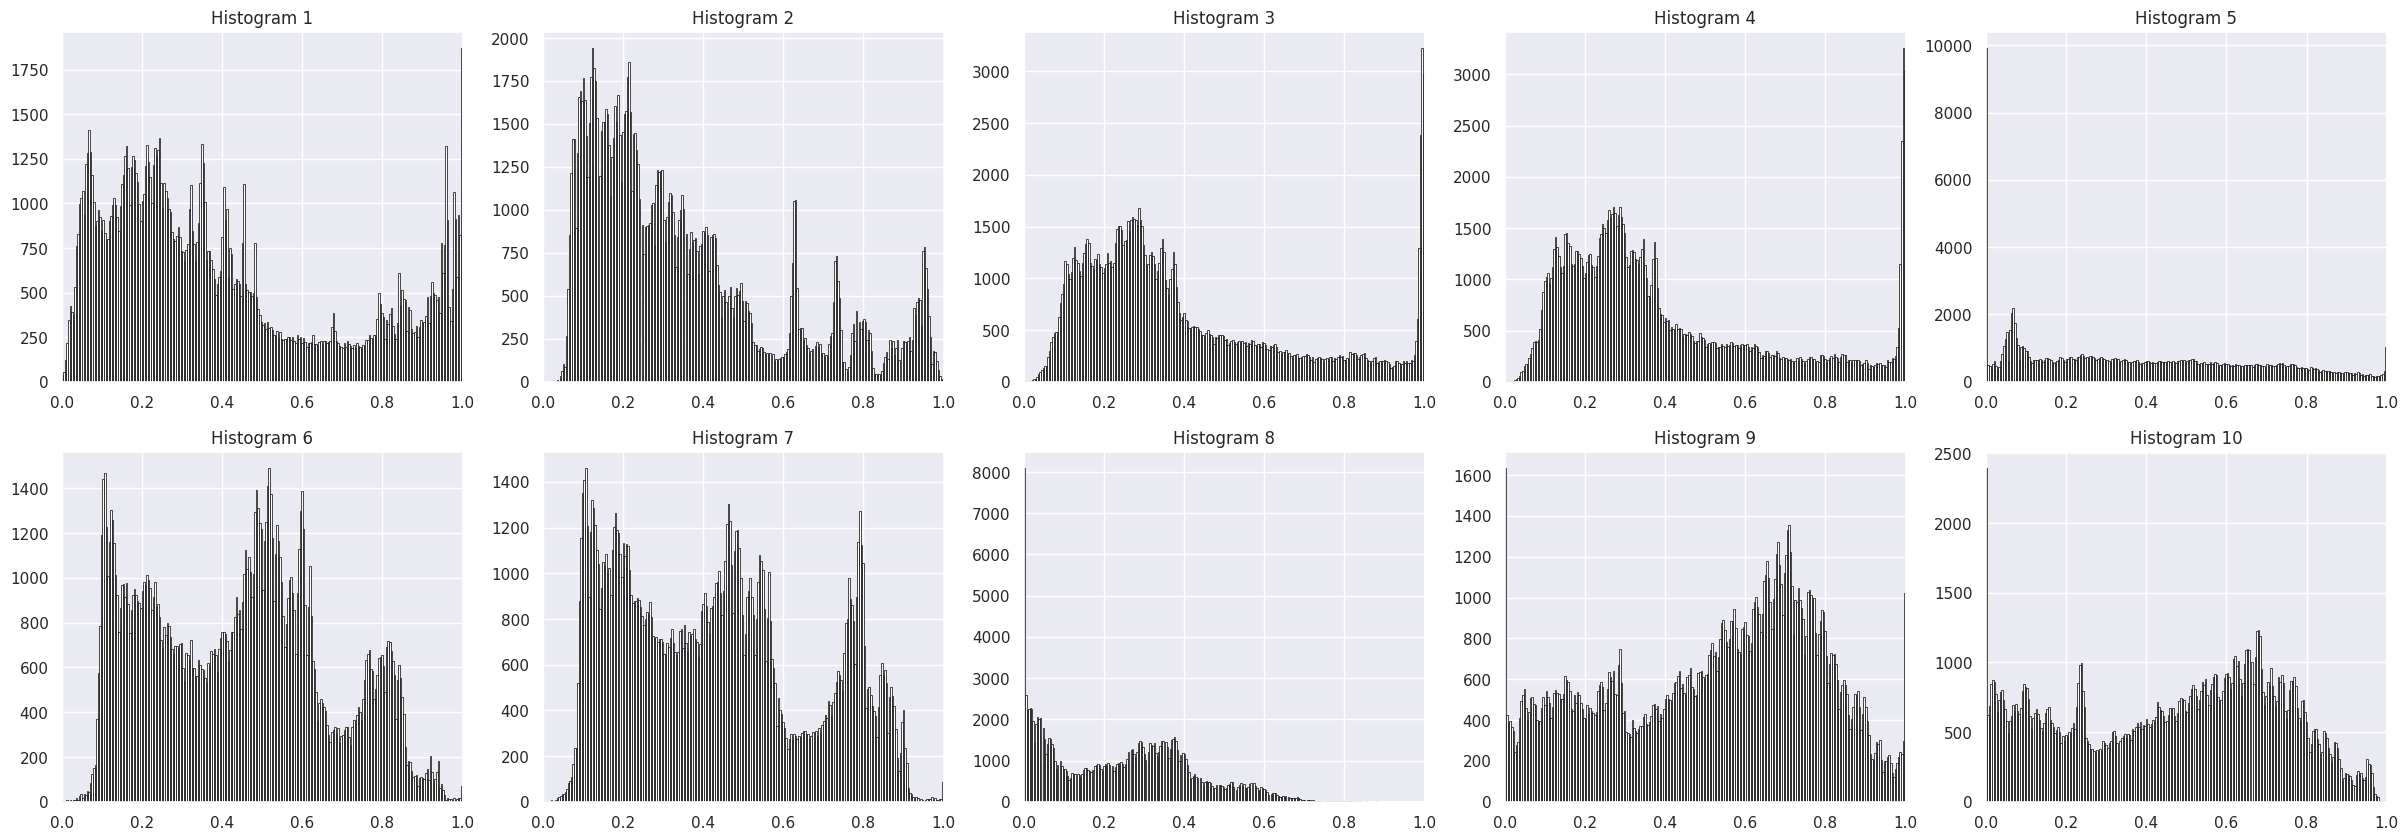

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from IPython.display import display

def plot_image_histogram(dir_path):

        # get the list of all files in the directory
        files = os.listdir(dir_path)

        # create an empty dataframe to store the results
        df = pd.DataFrame(columns=['Image Name', 'Min value', 'Max value'])

        # get the list of all image files in the directory
        image_files = [file for file in files if file.endswith('.png')]

        # randomly select 10 images
        selected_images = random.sample(image_files, 10)

        # create a 5x2 grid of subplots
        fig, axs = plt.subplots(2, 5, figsize=(30, 10))

        # loop through the selected images and plot them in the grid
        for i, image in enumerate(selected_images):
            row = i // 5
            col = i % 5

            path = os.path.join(dir_path, image)
            img = mpimg.imread(path)
            df.loc[i] = [image, np.min(img), np.max(img)]

            axs[row, col].hist(img.ravel(), bins=256, color='white', edgecolor='black', linewidth=0.5)
            axs[row, col].set_title(f'Histogram {i+1}')
            axs[row, col].set_xlim([0.0, 1])

        display(df)

        plt.show()


print ("Drowsy Sample Image Min Max and Histogram")
plot_image_histogram(dir_path_drowsy)

print ("Non Drowsy Sample Image Min Max and Histogram")
plot_image_histogram(dir_path_non_drowsy)